# Homework 1 - data validation & cleaning (deadline 31. 10. 2021, 23:59)

In short, the main task is to clean The Metropolitan Museum of Art Open Access dataset.
  
> The instructions are not given in details: It is up to you to come up with ideas on how to fulfill the particular tasks as best as you can!

However, we **strongly recommend and require** the following:
* Follow the assignment step by step. Number each step.
* Most steps contain the number of features that should be treated. You can preprocess more features, however, it does not mean that the teacher will give you more points. Focus on quality, not quantity.
* Properly comment all your steps. Comments are evaluated for 2 points of the total together with the final presentation of the solution. However, it is not desirable to write novels! 
* This task is the most challenging of the three, both timewise and computationally. Do not leave it to the last minute.
* Hand in a notebook that has already been run (i.e. do not delete outputs before handing in).

## What are you supposed to do:

  1. Download the dataset MetObjects.csv from the repository https://github.com/metmuseum/openaccess/.
  2. Check consistency (i.e. that same things are represented in the same way) of at least **three features** where you expect problems (include "Object Name" feature). You can propose how to clean the selected features, however do not apply cleaning (in your interest) 🙂 _(1.5 points)_
  3. Select at least **two features** where you expect integrity problems (describe your choice) and check integrity of those features. By integrity we mean correct logical relations between features (e.g. female names for females only). _(2 points)_
  4. Convert at least **five features** to a proper data type. Choose at least one numeric, one categorical and one datetime. _(1.5 points)_
  5. Find some outliers and describe your method. _(3 points, depends on creativity)_
  6. Detect missing data in at least **three features**, convert them to a proper representation (if they are already not), and impute missing values in at least **one feature**. _(1 + 3 points, depends on creativity)_
  7. Focus more precisely on the cleaning of the "Medium" feature. As if you were to use it in KNN algorithm later. _(2 points)_
  8. Focus on the extraction of physical dimensions of each item (width, depth and height in centimeters) from the "Dimensions" feature. _(2 points)_
  
All your steps and following code **have to be commented!** Comments are evaluated for 2 points together with the final presentation of the solution.

**If you do all this properly, you will obtain 18 points.**

## Comments

  * Please follow the technical instructions from https://courses.fit.cvut.cz/NI-PDD/homeworks/index.html.
  * If the reviewing teacher is not satisfied, she can (!) give you another chance to rework your homework and to obtain more points. However, this is not a given, so do your best! :)

In [ ]:
### libs
import numpy as np
import pandas as pd
import sklearn as skit
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency

import seaborn as sns
import re

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
### load dataset
df = pd.read_csv('MetObjects.csv')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3173: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
### view dataset
df.head(25)

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979.0,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980.0,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
5,67.265.12,False,False,False,6,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/6,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
6,67.265.13,False,False,False,7,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/7,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Birds|Coins,http://vocab.getty.edu/page/aat/300266506|http...,https://www.wikidata.org/wiki/Q5113|https://ww...
7,67.265.14,False,False,False,8,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/8,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Eagles|Men|Profiles,http://vocab.getty.edu/page/aat/300250049|http...,https://www.wikidata.org/wiki/Q2092297|https:/...
8,67.265.15,False,False,False,9,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/9,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
9,1979.486.3,False,False,False,10,NaN,The American Wing,1979.0,Coin,Two-and-a-half-dollar Indian Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/10,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [ ]:
display(df.columns)
display(df.dtypes)

Index(['Object Number', 'Is Highlight', 'Is Timeline Work', 'Is Public Domain',
       'Object ID', 'Gallery Number', 'Department', 'AccessionYear',
       'Object Name', 'Title', 'Culture', 'Period', 'Dynasty', 'Reign',
       'Portfolio', 'Constituent ID', 'Artist Role', 'Artist Prefix',
       'Artist Display Name', 'Artist Display Bio', 'Artist Suffix',
       'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date',
       'Artist End Date', 'Artist Gender', 'Artist ULAN URL',
       'Artist Wikidata URL', 'Object Date', 'Object Begin Date',
       'Object End Date', 'Medium', 'Dimensions', 'Credit Line',
       'Geography Type', 'City', 'State', 'County', 'Country', 'Region',
       'Subregion', 'Locale', 'Locus', 'Excavation', 'River', 'Classification',
       'Rights and Reproduction', 'Link Resource', 'Object Wikidata URL',
       'Metadata Date', 'Repository', 'Tags', 'Tags AAT URL',
       'Tags Wikidata URL'],
      dtype='object')

Object Number               object
Is Highlight                  bool
Is Timeline Work              bool
Is Public Domain              bool
Object ID                    int64
Gallery Number              object
Department                  object
AccessionYear               object
Object Name                 object
Title                       object
Culture                     object
Period                      object
Dynasty                     object
Reign                       object
Portfolio                   object
Constituent ID              object
Artist Role                 object
Artist Prefix               object
Artist Display Name         object
Artist Display Bio          object
Artist Suffix               object
Artist Alpha Sort           object
Artist Nationality          object
Artist Begin Date           object
Artist End Date             object
Artist Gender               object
Artist ULAN URL             object
Artist Wikidata URL         object
Object Date         

In [ ]:
df.info()
df.isnull().sum()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476411 entries, 0 to 476410
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            476411 non-null  object 
 1   Is Highlight             476411 non-null  bool   
 2   Is Timeline Work         476411 non-null  bool   
 3   Is Public Domain         476411 non-null  bool   
 4   Object ID                476411 non-null  int64  
 5   Gallery Number           46998 non-null   object 
 6   Department               476411 non-null  object 
 7   AccessionYear            471997 non-null  object 
 8   Object Name              474855 non-null  object 
 9   Title                    447220 non-null  object 
 10  Culture                  207071 non-null  object 
 11  Period                   90835 non-null   object 
 12  Dynasty                  23237 non-null   object 
 13  Reign                    11225 non-null   object 
 14  Port

(476411, 54)

In [ ]:
df.set_index('Object ID', inplace=True)

In [ ]:
df.nunique()

Object Number              473488
Is Highlight                    2
Is Timeline Work                2
Is Public Domain                2
Gallery Number                582
Department                     19
AccessionYear                 272
Object Name                 28414
Title                      237982
Culture                      7148
Period                       1861
Dynasty                       399
Reign                         388
Portfolio                    3476
Constituent ID              45803
Artist Role                  6783
Artist Prefix                7990
Artist Display Name         64052
Artist Display Bio          51997
Artist Suffix                2714
Artist Alpha Sort           64033
Artist Nationality           5029
Artist Begin Date           29434
Artist End Date             29444
Artist Gender                 283
Artist ULAN URL             35895
Artist Wikidata URL         38885
Object Date                 32493
Object Begin Date            2071
Object End Dat

In [ ]:
# TASK 1 - CONSISTENCY
### check consistency of 3 suspicious features
# 1. Artist Gender - 283 unique values
# 2. Country - 940 unique values
# 3. Object name - 28 414 unique values

display(df['Artist Gender'].unique())
display(df['Country'].unique())
display(df['Object Name'].unique())

### propose cleaning
# 1. Artist Gender - remove '|' signs - if 'Female' is present in a string, make the string 'Female', if a value contains only |s, make it 'Male'
# 2. Country - remove '?', '(?)', 'probably', 'possibly' and such from strings
# 3. Object Name - some objects have different type of detail in the name - ex. 'Coin' x 'Peso' - type of coin - Title then typically says both (ex. "Coin, 1/4 Peso")
#                - also problems with not consistent use of lower case and spaces
#                - solution: ex. if an object is a type of coin ("coin" present in title string), make Object Name "Coin" etc., also make everything lower case

array([nan, '|', '|Female', '||', '||||', 'Female|', 'Female', '|||',
       'Female|Female', '||Female', '|Female|Female', 'Female||',
       'Female|Female|Female|Female|Female||Female|Female||||||Female|Female|Female|Female|||Female|||Female|Female|',
       '|Female|', '|||Female', 'Female||Female', 'Female|Female|Female|',
       '||||||||', '|||||||||||||||||||||||||||', 'Female|Female|',
       'Female|Female||', 'Female|||', '|Female||', '|Female||Female',
       '||Female|', 'Female|Female|Female', '||||||', '|Female|||Female',
       '|||||', '||||Female|', '||||||||||', '||||||||||||||||',
       '|||||||', '|||||||||||||', '|||||||||', '||||||||||||||||||||',
       'Female|||||||||||||||||||||||||||||Female||Female||||',
       'Female||||Female|||Female|||||||||||||||||Female|',
       '|Female||||||||||||||Female', '||||||Female||||||',
       'Female||||Female|||||Female|||',
       '||||Female||||||Female|||||Female||||Female', '||||Female',
       '|||||||||||||||||||

array([nan, 'Mexico', 'Guatemala', 'United States', 'England', 'Spain',
       'United States|England', 'Netherlands',
       'United States|United States', 'France', 'Canada',
       'United States|France', 'England|France', 'China', 'Italy',
       'Japan', 'Germany', 'Netherlands|Netherlands', 'Czech Republic',
       'England|Ireland', 'Ireland|United States', 'Venezuela',
       'England|Netherlands', 'England|Belgium', 'France|Italy',
       'Bermuda', 'Ireland', 'India', 'England|United States',
       'United States|United States|United States',
       'France|NEW ZEALAND ROTORUA WHAKAREWAREWA',
       'China|NEW ZEALAND ROTORUA WHAKAREWAREWA', 'Germany|Italy',
       'Lisez et propagez nos Annales: "L\'Immacul‚e"',
       'France|Bernard Turner', 'France|Harold Copping',
       'Czech Republic|England', 'Belgium|France',
       'Belgium|England|France', 'United States|Germany',
       'France|Germany', 'Scotland', 'Germany|Czech Republic', 'Holland',
       'England|England', 

array(['Coin', 'Peso', 'Centavos', ..., 'Musket',
       'Small Upright (Giraffe) Piano', 'Cabochon for a ring'],
      dtype=object)

In [ ]:
# TASK 2 - INTEGRITY
### chceck integrity of 2 suspicious features
# 1. Object Begin Date + Object End Date
display(df.describe())
# max values are 5000 (Begin Date) / 15 335 (End Date) - should represent a year, but it's only the year 2021 (allegedly)
# also with Begin Date 5000, End Date is 0/1, but it is impossible to begin later than to end
# 2. Region x Country - some rows may have inputed cities that do not exist in inputed country
df2 = df[['Region','Country']].dropna().drop_duplicates()
display(df2)
# although not entirely wrong, some values clearly specify the region }located in only one country), but provide multiple possible countries of origin
# ex. ID 3086 Region: Bohemia Country: Czech Republic|England
# apart from these values, integrity of these 2 features appears to not be violated

,Object Begin Date,Object End Date,Metadata Date
count,476411.000000,476411.000000,0.0
mean,1293.714557,1394.544851,NaN
std,1752.218642,1136.417889,NaN
min,-400000.000000,-240000.000000,NaN
25%,1526.000000,1581.000000,NaN
50%,1800.000000,1835.000000,NaN
75%,1890.000000,1905.000000,NaN
max,5000.000000,15335.000000,NaN


,Region,Country
Object ID,,
151,New England,United States|United States
154,New England,United States
275,Midwest,United States
587,Bohemia,Czech Republic
595,Southern,United States
...,...,...
812106,Owo,Nigeria
813692,Gimbala region,Mali
815003,Sica Sica region,Bolivia


In [ ]:
# TASK 3 - CONVERSION
### convert 5+ features to a proper data type - numeric, categorical, datetime
# 1. Numerical - Constituent ID
df['Constituent ID'] = df['Constituent ID'].astype(str).astype(float)
# 2. Categorical - Artist Gender, Object Name
# assuming data is consistent, which it is not
a = df['Artist Gender'].dropna().unique().tolist()
gender_cat = pd.api.types.CategoricalDtype(categories=a, ordered=False)
b = df['Object Name'].dropna().unique().tolist()
object_cat = pd.api.types.CategoricalDtype(categories=b, ordered=False)

df['Artist Gender'] = df['Artist Gender'].astype(gender_cat)
df['Object Name'] = df['Object Name'].astype(object_cat)

# 3. Datetime - AccessionYear
df['AccessionYear']=pd.to_datetime(df['AccessionYear'], format='%Y', errors='ignore')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476411 entries, 1 to 855990
Data columns (total 53 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Object Number            476411 non-null  object  
 1   Is Highlight             476411 non-null  bool    
 2   Is Timeline Work         476411 non-null  bool    
 3   Is Public Domain         476411 non-null  bool    
 4   Gallery Number           46998 non-null   object  
 5   Department               476411 non-null  object  
 6   AccessionYear            471997 non-null  object  
 7   Object Name              474855 non-null  category
 8   Title                    447220 non-null  object  
 9   Culture                  207071 non-null  object  
 10  Period                   90835 non-null   object  
 11  Dynasty                  23237 non-null   object  
 12  Reign                    11225 non-null   object  
 13  Portfolio                23365 non-null   ob

89961

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
Object ID,,,,,,,,,,,,,,,,,,,,,
573096,06.322.48,False,False,True,NaN,Egyptian Art,1906.0,"Tool, Biface, Hand-axe, Ovate","Biface, commonly referred to as a hand ax",NaN,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
573104,06.322.136,False,False,True,NaN,Egyptian Art,1906.0,"Tool, biface, hand ax, sub-cordiform","Biface, commonly referred to as a hand ax",NaN,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
832566,2019.422,False,False,True,NaN,Arms and Armor,1999.0,Biface,Biface,Acheulean,...,NaN,Tools,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
573090,06.322.34,False,False,True,NaN,Egyptian Art,1906.0,"Tool, denticulate, Levallois",Denticulated Tool,NaN,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
573093,06.322.42,False,False,True,NaN,Egyptian Art,1906.0,"Core, Levallois",Levallois Core,NaN,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
Object ID,,,,,,,,,,,,,,,,,,,,,
502410,89.4.1811,False,False,False,NaN,Musical Instruments,1889.0,Bell,Bell,Italian (Ancient Roman),...,NaN,Idiophone-Struck-bell-clapper,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
502176,89.4.1612,False,False,True,NaN,Musical Instruments,1889.0,Bell,Bell,Italian (Ancient Roman),...,NaN,Idiophone-Struck-bell-without clapper,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
50409,1998.544.436,False,False,True,NaN,Asian Art,1998.0,Ring,NaN,Indonesia (Java),...,NaN,Jewelry,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
50433,1998.544.442,False,False,True,NaN,Asian Art,1998.0,Ring,NaN,Indonesia (Java),...,NaN,Jewelry,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
39179,1994.27,False,False,True,247.0,Asian Art,1994.0,Figurine,NaN,Indonesia (Java),...,NaN,Sculpture,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Deities|Buddhism,http://vocab.getty.edu/page/aat/300343850|http...,https://www.wikidata.org/wiki/Q178885|https://...


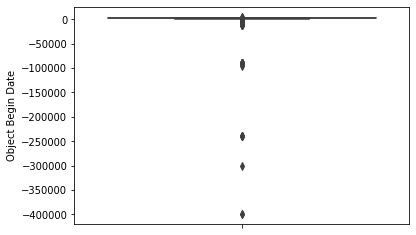

In [ ]:
# TASK 4 - OUTLIERS
### find outliers
df['Object Begin Date']=pd.to_datetime(df['Object Begin Date'], format='%Y', errors='ignore')
# outliers in age of specimen, detection using the rule of thumb
sns.boxplot(y=df['Object Begin Date'], data=df)
# outliers visible in -400000 - -100000 range
#rule of thumb: outliers are values outside of the interval (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR), where q1, q3 are bottom/top 25% and iqr are the middle 50%
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr =  q3 - q1
outliers = (df['Object Begin Date'] > q3['Object Begin Date'] + 1.5*iqr['Object Begin Date']) | (df['Object Begin Date'] < q1['Object Begin Date'] - 1.5*iqr['Object Begin Date'])
display(outliers.sum())
display(df[outliers].sort_values(['Object Begin Date'], ascending = True).head(5))
display(df[outliers].sort_values(['Object Begin Date'], ascending = False).head(5))
# we can see that q1 outliers contain previously mentioned artifacts old hundreds of thousands of years, while q3 outliers are not that old (and even
# containt artifacts whose values have integrity problems, as q3 is much more condensed around the more recent time period)

In [ ]:
# TASK 5 - IMPUTATION
### detect missing data in 3+ features
df.isnull().sum()
# 3 features, where not a lot of data is missing and they could be imputed, are:
#     object date (with object begin date and object end date)
#     object title (with object name)
#     medium (with object name/object title/object date)
# too much data missing: ex. dynasty, reign, portfolio, gallery number

### convert to a proper representation
# object name already converted

### impute missing data in 1+ feature'
# fill missing object begin date by Object Name
df.groupby('Object Name').df['Object Begin Date'].median()
df['DateMedian']=df['Object Begin Date']

AttributeError: 'DataFrameGroupBy' object has no attribute 'df'

In [ ]:
# TASK 6 - CLEANING
### clean "Medium" feature
df['Medium'].dropna().unique()
# 1. case consistency
# before: 64352 unique
df['Medium'] = df['Medium'].str.lower()
df['Medium'].nunique()
# after: 63057 unique
# :, ;, -, ., , consistency -> regex replacing
df['Medium']=df['Medium'].str.replace(';',',')
df['Medium']=df['Medium'].str.replace(':',',')
df['Medium']=df['Medium'].str.replace('.',',')
df['Medium'].nunique()
# after: 62632 unique
# useless signs/mistakes
df['Medium']=df['Medium'].str.replace('\r\n',' ')
df['Medium']=df['Medium'].str.replace('probably ','')
df['Medium']=df['Medium'].str.replace(' \(?\)','')
df['Medium'].nunique()
# after: 62554 unique

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  if sys.path[0] == '':
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: The default value of regex will change from True to False in a future version.


62554

In [ ]:
display(df['Dimensions'].unique().tolist())

['Dimensions unavailable',
 'Diam. 11/16 in. (1.7 cm)',
 'Diam. 1/2 in. (1.3 cm)',
 'Diam. 1 1/8 in. (2.9 cm)',
 'Diam. 3/4 in. (1.9 cm)',
 'Diam. 2 1/8 in. (5.4 cm)',
 '2 3/4 x 3 1/2 x 2 3/4 in. (7 x 8.9 x 7 cm)',
 '24 3/8 x 14 5/8 x 5 1/8 in. (61.9 x 37.1 x 13 cm)',
 'Overall: 19 7/16 x 13 x 9 1/4 in. (49.4 x 33 x 23.5 cm); 352 oz. 18 dwt. (10977 g)\r\nBody: H. 18 7/8 in. (47.9 cm)\r\nCover: 4 1/4 x 4 13/16 in. (10.8 x 12.2 cm); 19 oz. 6 dwt. (600.1 g)',
 '40 x 25 1/2 x 34 1/2 in. (101.6 x 64.8 x 87.6 cm)',
 'H. 12 in. (30.5 cm)',
 'H. 12 3/8 in. (31.4 cm)',
 '11 x 9 in. (27.9 x 22.9 cm)',
 'H. 6 9/16 in. (16.7 cm); Diam. 3 in. (7.6 cm)',
 'H. 6 1/4 in. (15.9 cm); Diam. 2 15/16 in. (7.5 cm)',
 '30 7/8 x 25 x 13 7/8 in. (78.4 x 63.5 x 35.2 cm)',
 'H. 27 in. (68.6 cm)',
 'H. 16 in. (40.6 cm)',
 'H. 17 in. (43.2 cm)',
 'H. 11 1/2 in. (29.2 cm)',
 'H. 16 1/2 in. (41.9 cm)',
 'H. 23 in. (58.4 cm)',
 '22 1/2 x 23 in. (57.2 x 58.4 cm)',
 '25 1/4 x 21 1/2 x 13 1/2 in. (64.1 x 54.6 x 34.3 cm)

In [ ]:
# TASK 7 - FEATURE EXTRACTION
### extraction of each dimension from "Dimensions"
### == parse -> 3 new features - width, depth, height

# 3 new features
widths = []
depths = []
heights = []
#display(df['Dimensions'].unique().tolist())
# types of values:
#Width: neco (TO x neco || neco(TO cm)
#Depth: neco x TO x neco (TO cm)
#Height: neco x TO cm) || neco(TO cm)
#    '38 3/4 x 20 7/8 x 17 1/2 in. (98.4 x 53 x 44.5 cm)'
#    'Diam. 12 1/16 in. (30.6 cm)'
#    'Overall: 4 in. (10.2 cm); 5 oz. 9 dwt. (170 g)\r\nLip: Diam. 3 1/8 in. (7.9 cm)\r\nBase: Diam. 2 1/2 in. (6.4 cm)',
#    '2 3/8 x 2 in. (6 x 5.1 cm)'
   
for value in df['Dimensions']:
    # all: .*\([0-9]+.*[0-9] x .*\)
    width = re.search(r"\([0-9]+\.*[0-9] x|Diam. .* \([0-9]+\.*[0-9] cm\)", str(value))
    if width:  
        width = re.search(r"\([0-9]+\.*[0-9] x|\([0-9]+\.*[0-9] cm\)", str(width.group())) # search again in substring which contains only cm values
        width = re.search(r"[0-9]+\.*[0-9]", str(width.group()))
        widths.append(width.group())
    else: widths.append(np.nan)

    depth = re.search(r"x [0-9]+\.*[0-9] x|Diam. .* \([0-9]+\.*[0-9] cm\)", str(value))
    if depth:  
        depth = re.search(r"x [0-9]+\.*[0-9] x|\([0-9]+\.*[0-9] cm\)", str(depth.group()))
        depth = re.search(r"[0-9]+\.*[0-9]", str(depth.group())) # search again in substring which contains only cm values
        depths.append(depth.group())
    else: depths.append(np.nan)

    height = re.search(r"x [0-9]+\.*[0-9] cm\)|H. .* \([0-9]+\.*[0-9] cm\)", str(value))
    if height:
        height = re.search(r"x [0-9]+\.*[0-9] cm\)|\([0-9]+\.*[0-9] cm\)", str(height.group()))  
        height = re.search(r"[0-9]+\.*[0-9]", str(height.group())) # search again in substring which contains only cm values
        heights.append(height.group())
    else: heights.append(np.nan)
df['Width'] = widths
df['Depth'] = depths
df['Height'] = heights

In [ ]:
display(df['Width'].unique())
display(df['Depth'].unique())
display(df['Height'].unique())
df.head()

array([nan, '1.7', '1.3', ..., '185.5', '210', '256'], dtype=object)

array([nan, '1.7', '1.3', ..., '54.5', '44.7', '46.2'], dtype=object)

array([nan, '13', '23.5', ..., '117.6', '174.9', '191'], dtype=object)

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL,Width,Depth,Height
Object ID,,,,,,,,,,,,,,,,,,,,,
1,1979.486.1,False,False,False,NaN,The American Wing,1979.0,Coin,One-dollar Liberty Head Coin,NaN,...,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,NaN,NaN,NaN
2,1980.264.5,False,False,False,NaN,The American Wing,1980.0,Coin,Ten-dollar Liberty Head Coin,NaN,...,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,NaN,NaN,NaN
3,67.265.9,False,False,False,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,...,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,1.7,1.7,NaN
4,67.265.10,False,False,False,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,...,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,1.7,1.7,NaN
5,67.265.11,False,False,False,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,NaN,...,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN,1.7,1.7,NaN


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0b385f11-2ed4-4dc2-8830-cc90200a6b88' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>